In [2]:
from openmmtools.multistate import MultiStateSamplerAnalyzer, MultiStateReporter
from openmmtools.openmm_torch.repex import get_atoms_from_resname
from openmm import app
import numpy as np
import os
import argparse
from rdkit import Chem
from rdkit.Chem import Draw
import matplotlib.pyplot as plt
# import seaborn as sns
import mdtraj
import logging
import glob
import yaml
from repex_analysis import write_correction, plot_correction_timeseries, plot_overlap, plot_rmsd

In [4]:
output_com = "/home/jhm72/rds/hpc-work/mace_fep/tyk2_single_edge/output/4GIH_lig_ejm_46/repex_4GIH_lig_ejm_46.nc"
output_sol = "/home/jhm72/rds/hpc-work/mace_fep/tyk2_single_edge/output/lig_ejm_46/repex_lig_ejm_46.nc"
R = 0.00198720425864083  # Gas constant in kcal/mol/K


In [5]:

rep_com = MultiStateReporter(output_com)
rep_sol = MultiStateReporter(output_sol)
ana_com = MultiStateSamplerAnalyzer(rep_com)
ana_sol = MultiStateSamplerAnalyzer(rep_sol)
temp=298.15

In [6]:
ana_com.get_free_energy()

(array([[   0.        ,  -19.98551835,  -40.53245906,  -61.51454933,
          -82.86531481, -104.55160506, -126.5588103 , -148.87774133,
         -171.49860258, -194.41428438, -217.62838209, -241.15481019],
        [  19.98551835,    0.        ,  -20.54694071,  -41.52903098,
          -62.87979646,  -84.56608672, -106.57329195, -128.89222299,
         -151.51308423, -174.42876604, -197.64286374, -221.16929184],
        [  40.53245906,   20.54694071,    0.        ,  -20.98209027,
          -42.33285575,  -64.01914601,  -86.02635124, -108.34528228,
         -130.96614352, -153.88182533, -177.09592303, -200.62235113],
        [  61.51454933,   41.52903098,   20.98209027,    0.        ,
          -21.35076548,  -43.03705573,  -65.04426097,  -87.363192  ,
         -109.98405325, -132.89973505, -156.11383276, -179.64026086],
        [  82.86531481,   62.87979646,   42.33285575,   21.35076548,
            0.        ,  -21.68629025,  -43.69349549,  -66.01242652,
          -88.63328777, -111.5

In [7]:
write_correction(ana_com, ana_sol, temp, "lig_46.out")


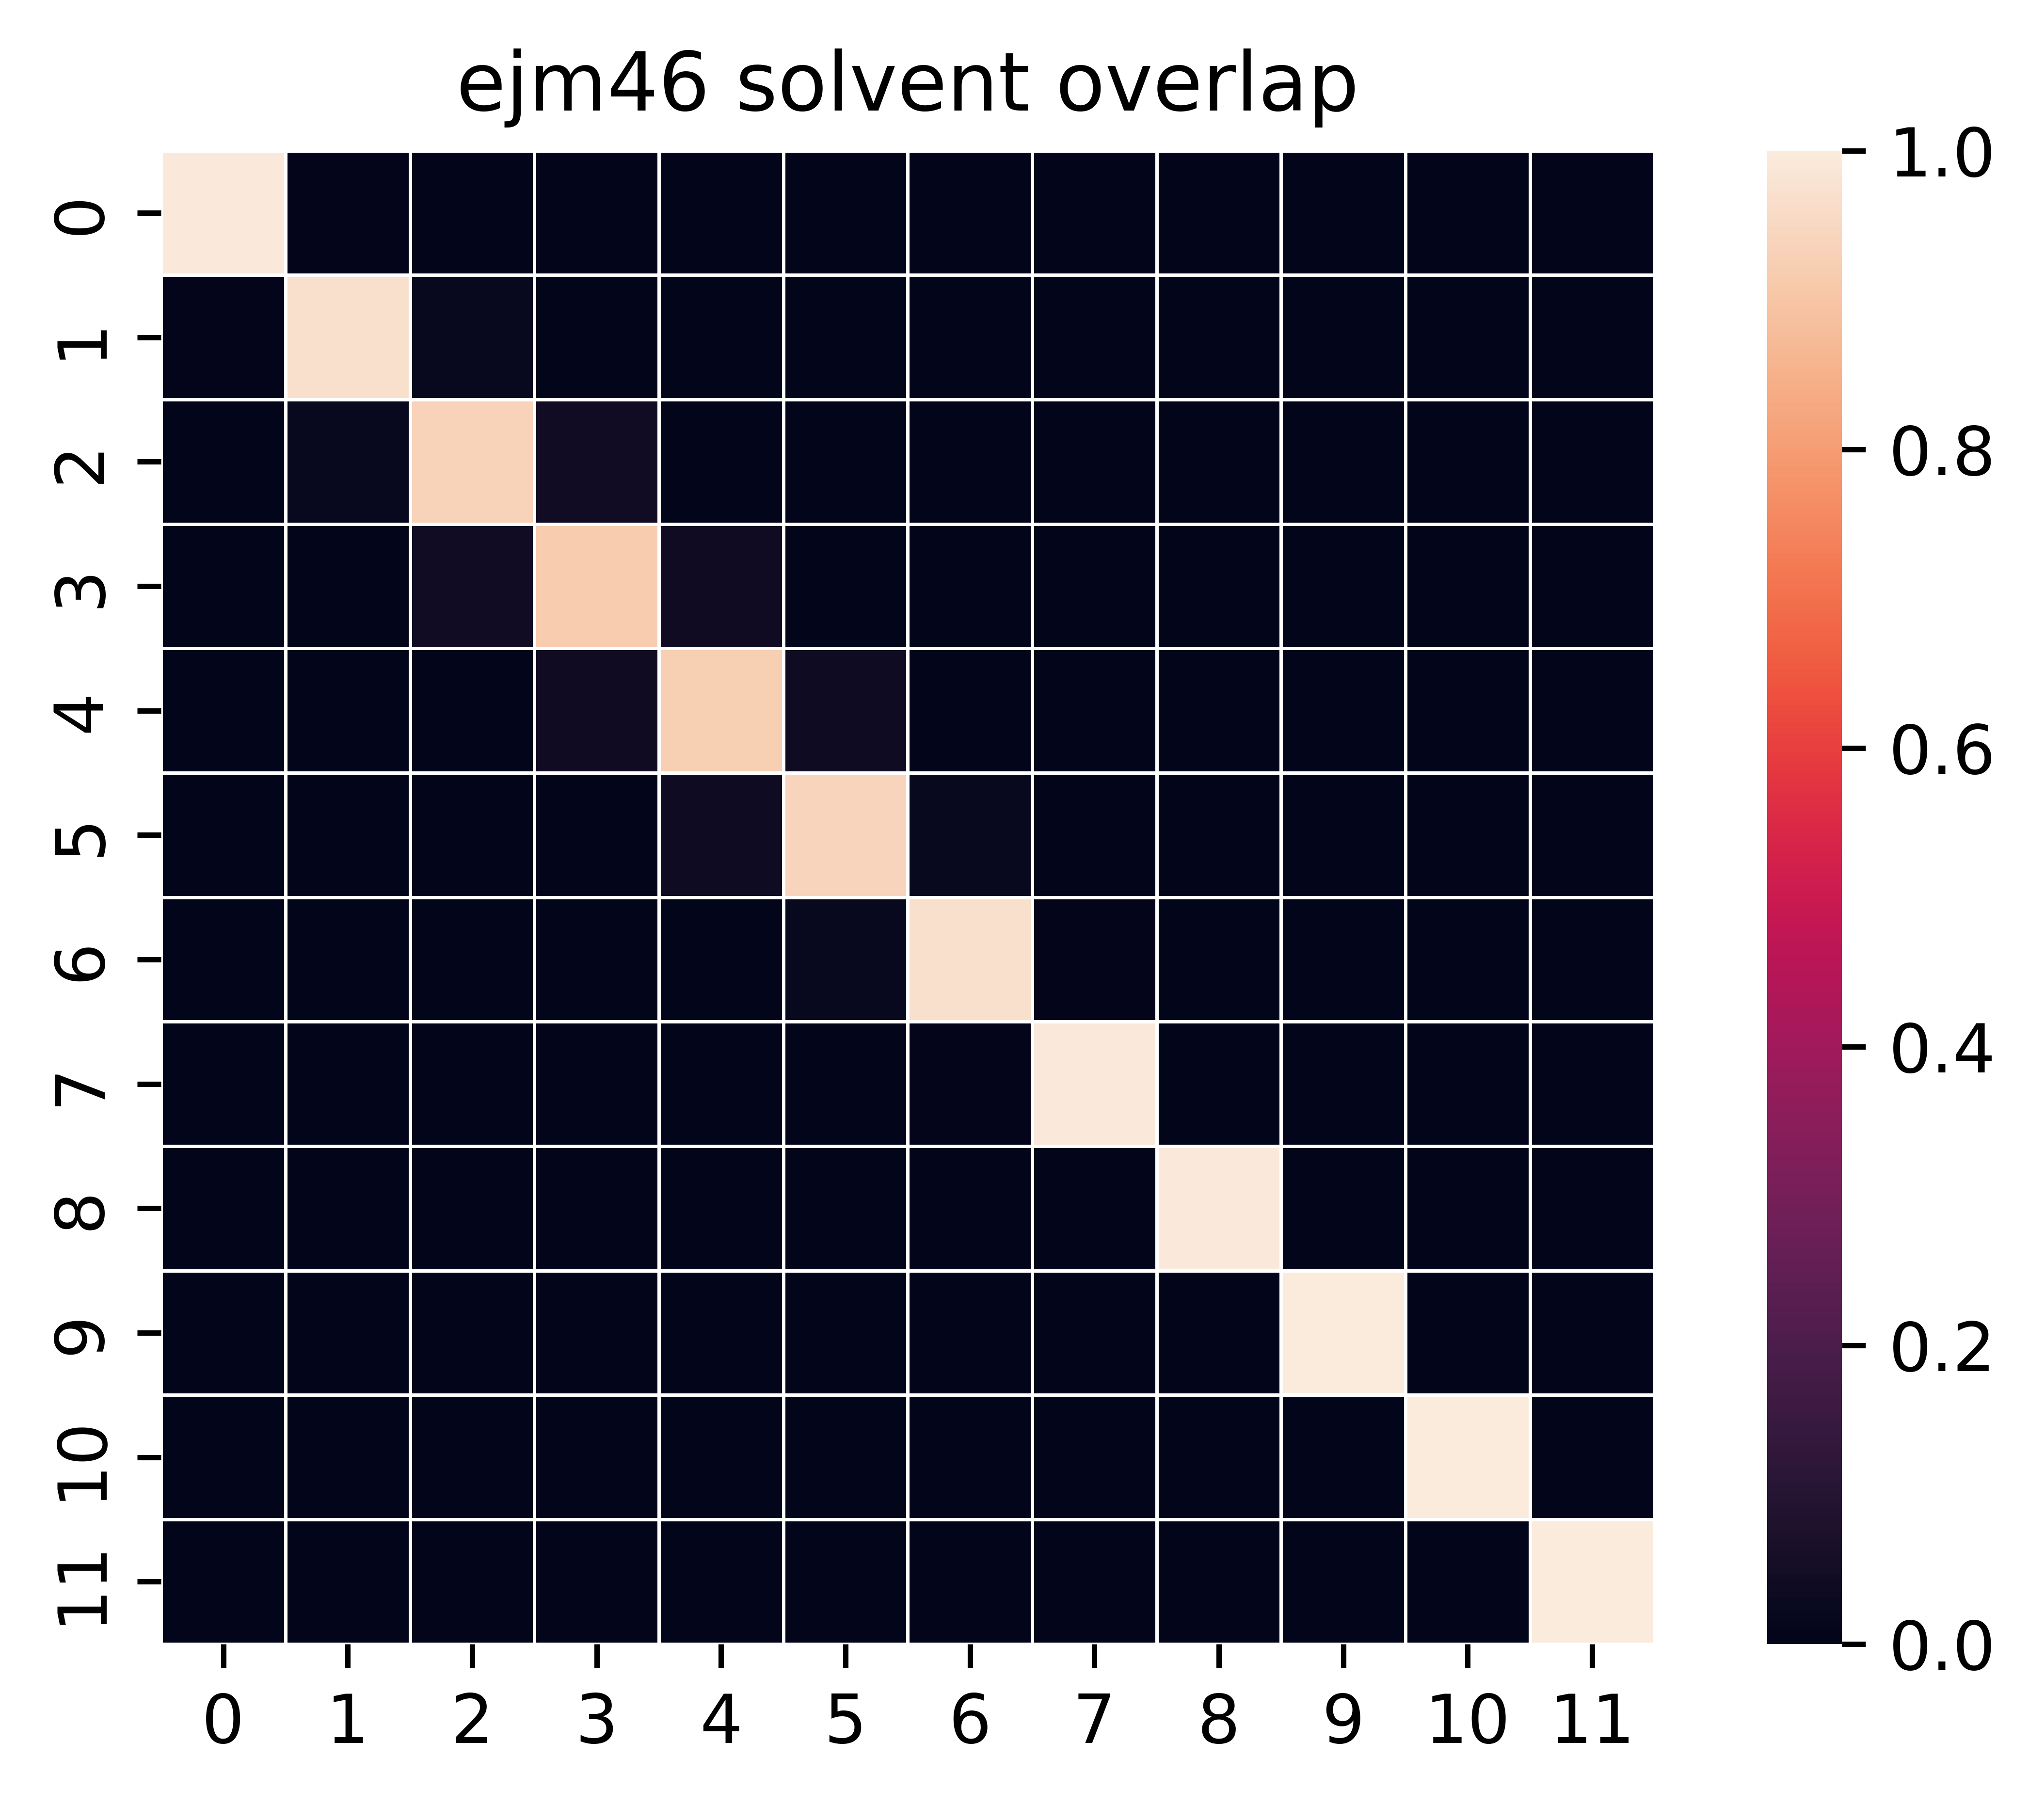

In [11]:
plot_overlap(lig="ejm46", leg="solvent", analyser=ana_sol, out_file="overlap_sol_ejm46.txt")

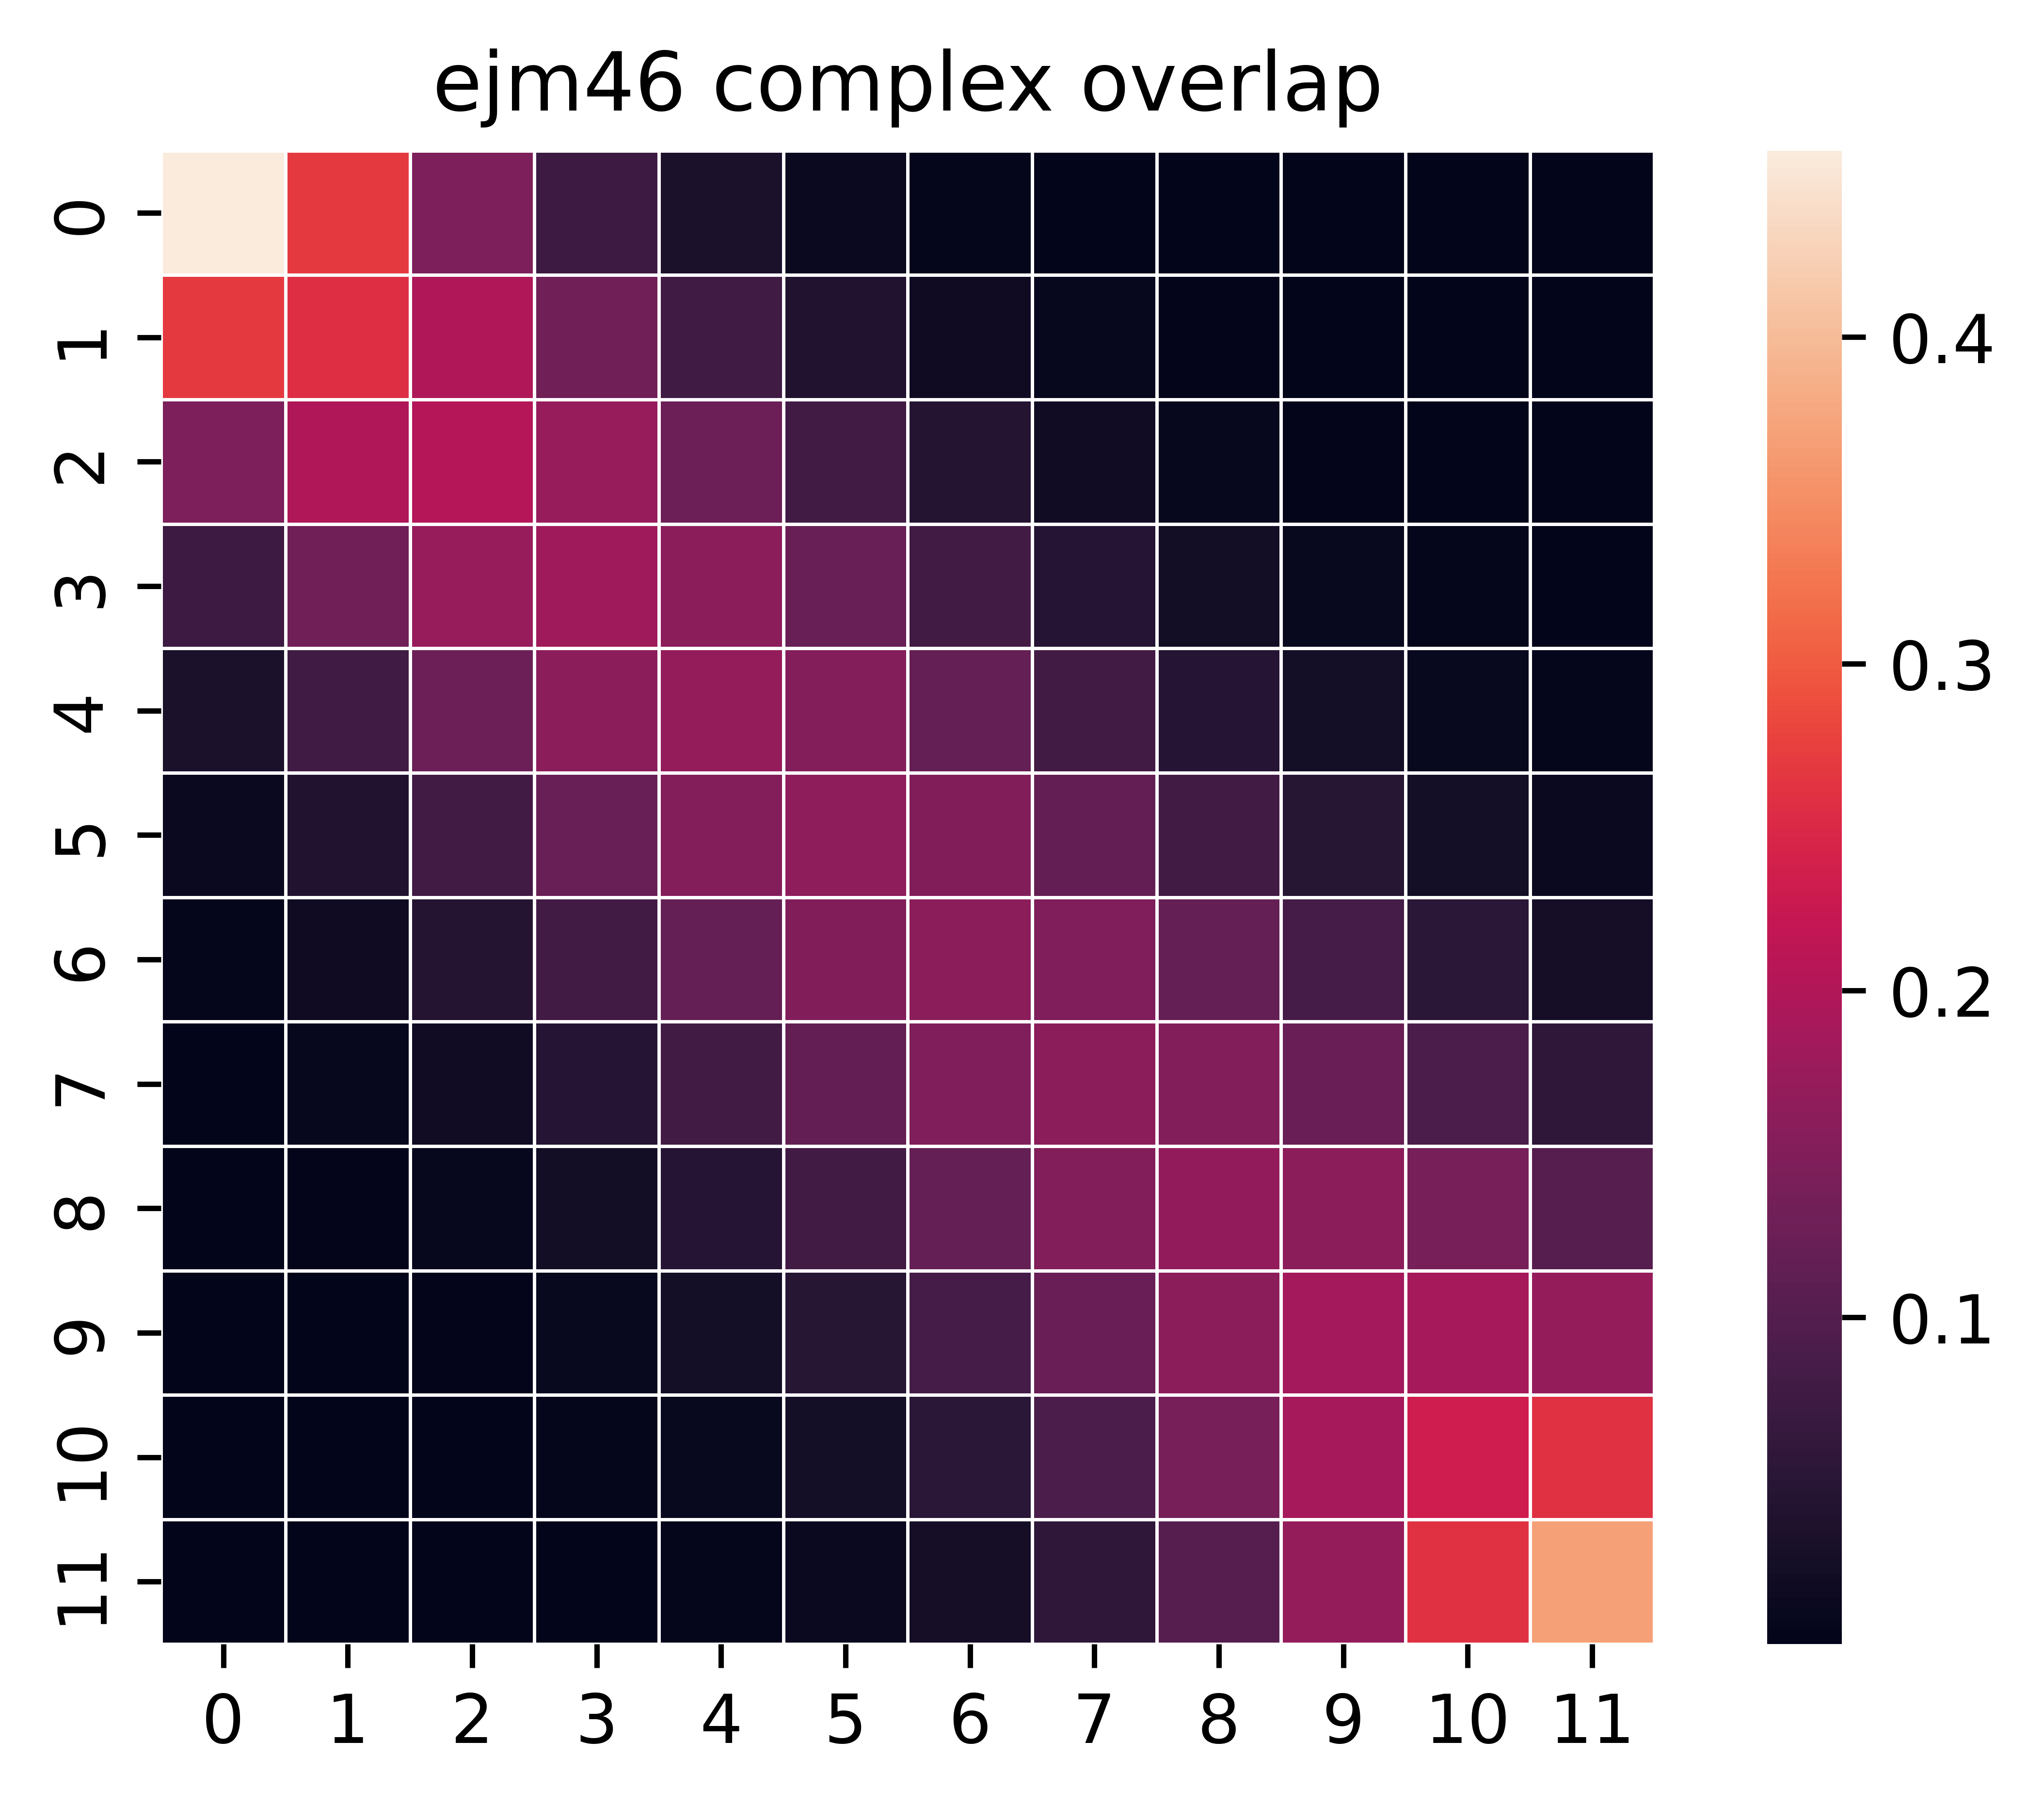

In [12]:

plot_overlap(lig="ejm46", leg="complex", analyser=ana_com, out_file="overlap_com_ejm46")

OSError: [Errno -51] NetCDF: Unknown file format: b'/home/jhm72/rds/hpc-work/mace_fep/tyk2_single_edge/output/4GIH_lig_ejm_46/repex_4GIH_lig_ejm_46_real_time_analysis.yaml'

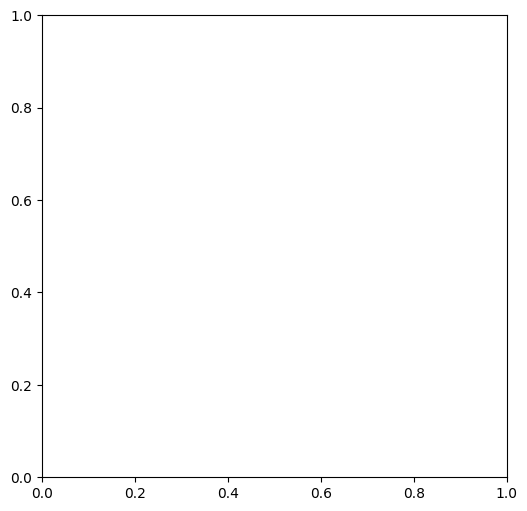

In [13]:
plot_rmsd("/home/jhm72/rds/hpc-work/mace_fep/tyk2_single_edge/input_files/complex/4GIH_lig_ejm_46.pdb", path_nc="/home/jhm72/rds/hpc-work/mace_fep/tyk2_single_edge/output/4GIH_lig_ejm_46/repex_4GIH_lig_ejm_46.nc", analyser=ana_com, out_file="ejm46_com_rmsd", resname="UNK")

In [8]:
plot_correction_timeseries(output_com, output_sol, 298, "ejm_46_correction.txt")

max_delta = 1.374472e-06, tol = 1.000000e-12, maximum_iterations = 10000, iterations completed = 9999


ParameterError: Warning: Should have \sum_n W_nk = 1.  Actual column sum for state 0 was 1.087273. 12 other columns have similar problems

In [16]:
data_files = glob.glob("output/*/*46_real_time_analysis.yaml", recursive=True)

data_files

['output/lig_ejm_46_backup/repex_lig_ejm_46_real_time_analysis.yaml',
 'output/lig_ejm_46/repex_lig_ejm_46_real_time_analysis.yaml',
 'output/4GIH_lig_ejm_46_backup/repex_4GIH_lig_ejm_46_real_time_analysis.yaml',
 'output/4GIH_lig_ejm_46/repex_4GIH_lig_ejm_46_real_time_analysis.yaml']

In [21]:
def plot_errors(file: str, temp = 298.15):
    fig, axs = plt.subplots(2, 1, figsize=(12, 6), sharex=True)
    # print(axs[0,:].shape)
    # for file, ax1, ax2 in zip(files, axs[0,:].flatten(), axs[1, :].flatten()):
    with open(file, "r") as f:
        data = yaml.load(f, yaml.Loader)
    iters = [d["iteration"] for d in data]
    free_energy = [d["mbar_analysis"]["free_energy_in_kT"] * R * temp  for d in data]
    errors = [d["mbar_analysis"]["standard_error_in_kT"] * R * temp for d in data]
    # errors[0] = 0
    throughout = np.mean([d["timing_data"]["ns_per_day"] for d in data])
    print(throughout)

    ys = [free_energy, errors]
    y_labels = ["free energy / kT", "Standard error / KT"]
    # axs.set_title(file.split("/")[-1].split('_real_time_analysis')[0])
    axs.flatten()[0].plot(iters, ys[0], marker=".")
    axs.flatten()[1].plot(iters, ys[1], marker=".", color="orange")
    fig.supylabel("free energy / kT")
    fig.supxlabel("iterations")
    plt.show()

12.371907413674013


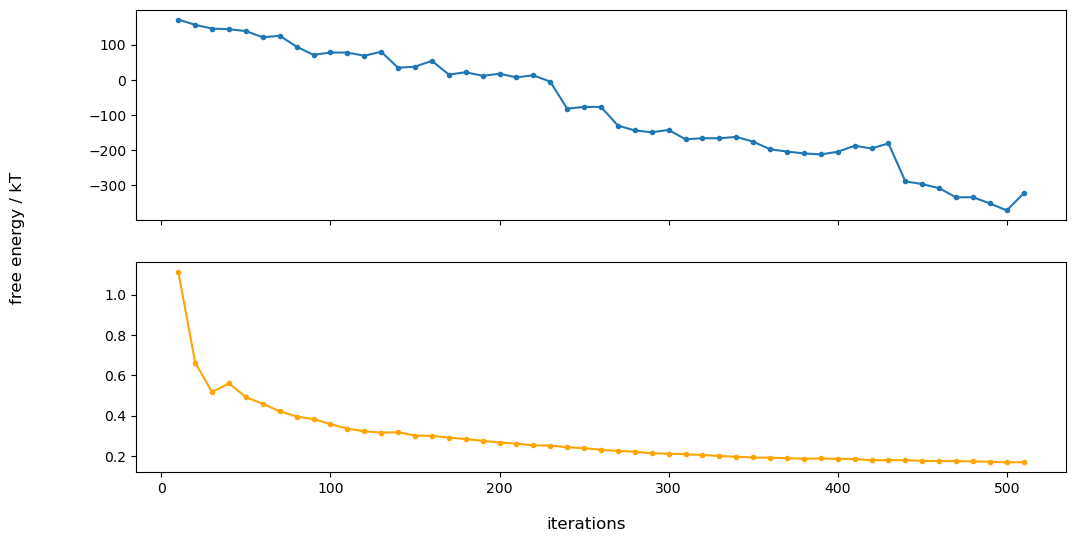

In [22]:
plot_errors("/home/jhm72/rds/hpc-work/mace_fep/tyk2_single_edge/output/4GIH_lig_ejm_46_backup/repex_4GIH_lig_ejm_46_real_time_analysis.yaml")


In [ ]:
#Trying to work out what's happened to the ejm31 ligand simulations which keeps failing
